**Deep Learning with TensorFlow**

**Importing some Basic Libraries**

In [24]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import squarify

# keras
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras


In [25]:
#Download data from 
#loading outside dataset from 
#https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
#Again, there are many ways to solve this, and one of ways is using CNN (review after finishing object detection course)
#https://www.kaggle.com/serkanpeldek/keras-cnn-transfer-learnings-on-cats-dogs-dataset

#This is what I learned from Deeplearning.ai specialization: Course 4 on Convolutional Neural Networks
#Usually, models are CONV - POOL, CONV - POOL, then FC layers
#https://www.coursera.org/learn/convolutional-neural-networks/lecture/uRYL1/cnn-example
#Assignment: https://www.coursera.org/learn/convolutional-neural-networks/notebook/7XDi8/convolutional-model-step-by-step

import os #iterate through directories and paths
import cv2 #pip install opencv-python 

DATADIR = "/Users/jooyeon/Downloads/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog", "Cat"]

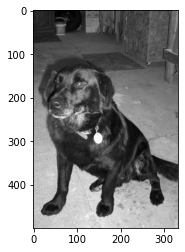

In [26]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    
    


In [27]:
print(img_array) #it will show pixels in 2D for grayscale, 3D for RGB

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


In [28]:
print(img_array.shape)

(500, 333)


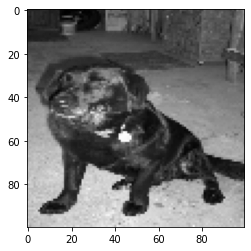

In [29]:
#normalize shapes
IMG_SIZE = 100 #50?? make it big enough to figure it out
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap ='gray')
plt.show()

In [30]:
training_data = []
def create_training_data():  
    for category in CATEGORIES:    #CATEGORIES = ["Dog", "Cat"]
        path = os.path.join(DATADIR, category) 
        class_num = CATEGORIES.index(category) #0 = dog, 1 = cat
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [31]:
create_training_data()

In [32]:
print(len(training_data))

24946


In [33]:
import random 
random.shuffle(training_data)

In [34]:
for sample in training_data[:5]:
#     print(sample)
#     print(sample[0]) #image array
    print(sample[1]) #labels of 0 or 1

0
1
1
1
0


In [35]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #-1 is used for unknow dimention (based on other values, code will figure it out) Then, reshape to IMG_SIZE x IMG_SIZE. 1 is for grayscale.
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3) #use 3 for RGB image

print(X.shape)

(24946, 100, 100, 1)


In [46]:
#Save this data, so that we don't need to keep calculating it every time 
#we want to play with the neural network model:

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
